In [2]:
import pandas as pd
train_df = pd.read_csv("preprocessed_train.csv")
test_df = pd.read_csv("preprocessed_test.csv")

In [3]:
train_df

,patient_id,pathology,image_path,assessment,subtlety,mass_shape_ARCHITECTURAL_DISTORTION,mass_shape_ASYMMETRIC_BREAST_TISSUE,mass_shape_FOCAL_ASYMMETRIC_DENSITY,mass_shape_IRREGULAR,mass_shape_IRREGULAR-ARCHITECTURAL_DISTORTION,...,calc_distribution_CLUSTERED,calc_distribution_CLUSTERED-LINEAR,calc_distribution_CLUSTERED-SEGMENTAL,calc_distribution_DIFFUSELY_SCATTERED,calc_distribution_LINEAR,calc_distribution_LINEAR-SEGMENTAL,calc_distribution_REGIONAL,calc_distribution_REGIONAL-REGIONAL,calc_distribution_SEGMENTAL,calc_distribution_nan
0,P_00001,MALIGNANT,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,4,4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,P_00001,MALIGNANT,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,4,4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,P_00004,BENIGN,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,4,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,P_00004,BENIGN,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,4,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,P_00004,BENIGN,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,4,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,P_02566,MALIGNANT,Calc-Training_P_02566_RIGHT_MLO/1.3.6.1.4.1.95...,5,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2860,P_02572,MALIGNANT,Calc-Training_P_02572_LEFT_CC/1.3.6.1.4.1.9590...,0,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2861,P_02572,MALIGNANT,Calc-Training_P_02572_LEFT_MLO/1.3.6.1.4.1.959...,0,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2862,P_02584,BENIGN,Calc-Training_P_02584_LEFT_CC/1.3.6.1.4.1.9590...,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
train_df["pathology"].value_counts()

pathology
MALIGNANT                  1181
BENIGN                     1105
BENIGN_WITHOUT_CALLBACK     578
Name: count, dtype: int64

In [5]:
train_df["pathology"] = train_df["pathology"].map({
    "MALIGNANT": 1,
    "BENIGN": 0,
    "BENIGN_WITHOUT_CALLBACK": 0  # Treat as benign
})

In [6]:
train_df["pathology"]

0       1
1       1
2       0
3       0
4       0
       ..
2859    1
2860    1
2861    1
2862    0
2863    0
Name: pathology, Length: 2864, dtype: int64

In [7]:
test_df
test_df["pathology"].value_counts()

pathology
BENIGN                     324
MALIGNANT                  276
BENIGN_WITHOUT_CALLBACK    104
Name: count, dtype: int64

In [8]:
test_df["pathology"] = test_df["pathology"].map({
    "MALIGNANT": 1,
    "BENIGN": 0,
    "BENIGN_WITHOUT_CALLBACK": 0  # Treat as benign
})

In [9]:
test_df

,patient_id,pathology,image_path,assessment,subtlety,mass_shape_ARCHITECTURAL_DISTORTION,mass_shape_ASYMMETRIC_BREAST_TISSUE,mass_shape_FOCAL_ASYMMETRIC_DENSITY,mass_shape_IRREGULAR,mass_shape_IRREGULAR-ARCHITECTURAL_DISTORTION,...,calc_distribution_CLUSTERED,calc_distribution_CLUSTERED-LINEAR,calc_distribution_CLUSTERED-SEGMENTAL,calc_distribution_DIFFUSELY_SCATTERED,calc_distribution_LINEAR,calc_distribution_LINEAR-SEGMENTAL,calc_distribution_REGIONAL,calc_distribution_REGIONAL-REGIONAL,calc_distribution_SEGMENTAL,calc_distribution_nan
0,P_00016,1,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...,5,5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,P_00016,1,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...,5,5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,P_00017,1,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...,4,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,P_00017,1,Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...,4,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,P_00032,0,Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,P_02464,1,Calc-Test_P_02464_RIGHT_MLO/1.3.6.1.4.1.9590.1...,0,4,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
700,P_02498,0,Calc-Test_P_02498_RIGHT_CC/1.3.6.1.4.1.9590.10...,0,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
701,P_02498,0,Calc-Test_P_02498_RIGHT_MLO/1.3.6.1.4.1.9590.1...,0,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
702,P_02501,1,Calc-Test_P_02501_RIGHT_CC/1.3.6.1.4.1.9590.10...,0,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [10]:
test_df

,patient_id,pathology,image_path,assessment,subtlety,mass_shape_ARCHITECTURAL_DISTORTION,mass_shape_ASYMMETRIC_BREAST_TISSUE,mass_shape_FOCAL_ASYMMETRIC_DENSITY,mass_shape_IRREGULAR,mass_shape_IRREGULAR-ARCHITECTURAL_DISTORTION,...,calc_distribution_CLUSTERED,calc_distribution_CLUSTERED-LINEAR,calc_distribution_CLUSTERED-SEGMENTAL,calc_distribution_DIFFUSELY_SCATTERED,calc_distribution_LINEAR,calc_distribution_LINEAR-SEGMENTAL,calc_distribution_REGIONAL,calc_distribution_REGIONAL-REGIONAL,calc_distribution_SEGMENTAL,calc_distribution_nan
0,P_00016,1,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...,5,5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,P_00016,1,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...,5,5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,P_00017,1,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...,4,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,P_00017,1,Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...,4,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,P_00032,0,Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,P_02464,1,Calc-Test_P_02464_RIGHT_MLO/1.3.6.1.4.1.9590.1...,0,4,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
700,P_02498,0,Calc-Test_P_02498_RIGHT_CC/1.3.6.1.4.1.9590.10...,0,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
701,P_02498,0,Calc-Test_P_02498_RIGHT_MLO/1.3.6.1.4.1.9590.1...,0,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
702,P_02501,1,Calc-Test_P_02501_RIGHT_CC/1.3.6.1.4.1.9590.10...,0,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
train_df

In [ ]:
test_df

In [ ]:
test_df["pathology"] = test_df["pathology"].map({
    "MALIGNANT": 1,
    "BENIGN": 0,
    "BENIGN_WITHOUT_CALLBACK": 0  # Treat as benign
})

In [ ]:
test_df

In [ ]:
train_df["pathology"] = train_df["pathology"].map({
    "MALIGNANT": 1,
    "BENIGN": 0,
    "BENIGN_WITHOUT_CALLBACK": 0  # Treat as benign
})

In [ ]:
train_df

In [ ]:
test_df

In [ ]:
test_df

In [ ]:
train_df = train_df.copy()  # Ensure modifications are applied
test_df = test_df.copy()

train_df["pathology"] = train_df["pathology"].map({
    "MALIGNANT": 1,
    "BENIGN": 0,
    "BENIGN_WITHOUT_CALLBACK": 0
}).astype(int)

test_df["pathology"] = test_df["pathology"].map({
    "MALIGNANT": 1,
    "BENIGN": 0,
    "BENIGN_WITHOUT_CALLBACK": 0
}).astype(int)

# Verify changes
print(train_df["pathology"].unique())  # Should print: [0 1]
print(test_df["pathology"].unique())   # Should print: [0 1]


In [ ]:
test_df

In [11]:
X_train = train_df.drop(columns=["pathology", "patient_id", "image_path"], errors="ignore")
y_train = train_df["pathology"]

X_test = test_df.drop(columns=["pathology", "patient_id", "image_path"], errors="ignore")
y_test = test_df["pathology"]

In [12]:
X_train

,assessment,subtlety,mass_shape_ARCHITECTURAL_DISTORTION,mass_shape_ASYMMETRIC_BREAST_TISSUE,mass_shape_FOCAL_ASYMMETRIC_DENSITY,mass_shape_IRREGULAR,mass_shape_IRREGULAR-ARCHITECTURAL_DISTORTION,mass_shape_IRREGULAR-FOCAL_ASYMMETRIC_DENSITY,mass_shape_LOBULATED,mass_shape_LOBULATED-ARCHITECTURAL_DISTORTION,...,calc_distribution_CLUSTERED,calc_distribution_CLUSTERED-LINEAR,calc_distribution_CLUSTERED-SEGMENTAL,calc_distribution_DIFFUSELY_SCATTERED,calc_distribution_LINEAR,calc_distribution_LINEAR-SEGMENTAL,calc_distribution_REGIONAL,calc_distribution_REGIONAL-REGIONAL,calc_distribution_SEGMENTAL,calc_distribution_nan
0,4,4,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4,4,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,5,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2860,0,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2861,0,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2862,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
X_test

,assessment,subtlety,mass_shape_ARCHITECTURAL_DISTORTION,mass_shape_ASYMMETRIC_BREAST_TISSUE,mass_shape_FOCAL_ASYMMETRIC_DENSITY,mass_shape_IRREGULAR,mass_shape_IRREGULAR-ARCHITECTURAL_DISTORTION,mass_shape_IRREGULAR-FOCAL_ASYMMETRIC_DENSITY,mass_shape_LOBULATED,mass_shape_LOBULATED-ARCHITECTURAL_DISTORTION,...,calc_distribution_CLUSTERED,calc_distribution_CLUSTERED-LINEAR,calc_distribution_CLUSTERED-SEGMENTAL,calc_distribution_DIFFUSELY_SCATTERED,calc_distribution_LINEAR,calc_distribution_LINEAR-SEGMENTAL,calc_distribution_REGIONAL,calc_distribution_REGIONAL-REGIONAL,calc_distribution_SEGMENTAL,calc_distribution_nan
0,5,5,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5,5,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,4,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
700,0,3,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
701,0,3,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
702,0,3,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [14]:
y_train

0       1
1       1
2       0
3       0
4       0
       ..
2859    1
2860    1
2861    1
2862    0
2863    0
Name: pathology, Length: 2864, dtype: int64

In [15]:
y_test


0      1
1      1
2      1
3      1
4      0
      ..
699    1
700    0
701    0
702    1
703    1
Name: pathology, Length: 704, dtype: int64

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_val)

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_val)

print("Random Forest Accuracy:", accuracy_score(y_val, rf_preds))
print("Random Forest Report:\n", classification_report(y_val, rf_preds))

print("XGBoost Accuracy:", accuracy_score(y_val, xgb_preds))
print("XGBoost Report:\n", classification_report(y_val, xgb_preds))

Random Forest Accuracy: 0.8132635253054101
Random Forest Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       324
           1       0.83      0.71      0.77       249

    accuracy                           0.81       573
   macro avg       0.82      0.80      0.81       573
weighted avg       0.82      0.81      0.81       573

XGBoost Accuracy: 0.8237347294938918
XGBoost Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86       324
           1       0.87      0.69      0.77       249

    accuracy                           0.82       573
   macro avg       0.84      0.81      0.81       573
weighted avg       0.83      0.82      0.82       573



In [19]:
!where python  


C:\Users\devan\AppData\Local\Programs\Python\Python313\python.exe
C:\Users\devan\AppData\Local\Programs\Python\Python311\python.exe
C:\Users\devan\AppData\Local\Microsoft\WindowsApps\python.exe


In [20]:
!pip show seaborn opencv-python tensorflow

Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: C:\Users\devan\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 
---
Name: opencv-python
Version: 4.11.0.86
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: C:\Users\devan\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: numpy
Required-by: 
---
Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\devan\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml

In [21]:
import sys
print(sys.executable)

C:\Users\devan\AppData\Local\Programs\Python\Python311\python.exe


In [23]:
import os
from os import listdir
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

import cv2
from matplotlib.image import imread

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import glob
import PIL
import random

random.seed(100)

In [24]:
dicom_data = pd.read_csv('dicom_info.csv')
image_dir = '../jpeg'

In [25]:
import os
import pandas as pd

# Check if dicom_info.csv exists
dicom_path = 'dicom_info.csv'
if os.path.exists(dicom_path):
    print("✅ DICOM CSV found!")
else:
    print("❌ DICOM CSV NOT found!")

# Check if the image directory exists
image_dir = '../jpeg'
if os.path.exists(image_dir):
    print("✅ JPEG Image directory found!")
else:
    print("❌ JPEG Image directory NOT found!")

# List some images in the JPEG folder
print("Sample images:", os.listdir(image_dir)[:5])  


✅ DICOM CSV found!
✅ JPEG Image directory found!
Sample images: ['1.3.6.1.4.1.9590.100.1.2.100018879311824535125115145152454291132', '1.3.6.1.4.1.9590.100.1.2.100131208110604806117271735422083351547', '1.3.6.1.4.1.9590.100.1.2.100522099512256189513864912954167862869', '1.3.6.1.4.1.9590.100.1.2.100522676511025180541602449080267145647', '1.3.6.1.4.1.9590.100.1.2.10055294210766234140934516480682841962']


In [26]:
dicom_data.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [27]:
dicom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [28]:
cropped_images = dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
cropped_images.head()

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [29]:
cc=cropped_images.copy()

In [30]:
cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
cropped_images.head()

0     ../jpeg/1.3.6.1.4.1.9590.100.1.2.1293087268128...
3     ../jpeg/1.3.6.1.4.1.9590.100.1.2.3811873696115...
6     ../jpeg/1.3.6.1.4.1.9590.100.1.2.1533390529131...
7     ../jpeg/1.3.6.1.4.1.9590.100.1.2.1789947146114...
10    ../jpeg/1.3.6.1.4.1.9590.100.1.2.4118334926123...
Name: image_path, dtype: object

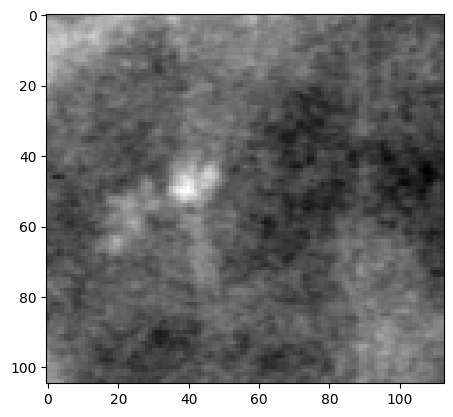

In [31]:
for file in cropped_images[0:10]:
    cropped_images_show = PIL.Image.open(file)
    gray_img= cropped_images_show.convert("L")
    plt.imshow(gray_img, cmap='gray')

In [32]:
full_mammogram_images = dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
full_mammogram_images.head()

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

In [33]:
full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_mammogram_images.head()

1     ../jpeg/1.3.6.1.4.1.9590.100.1.2.2483867420106...
2     ../jpeg/1.3.6.1.4.1.9590.100.1.2.2672131710111...
11    ../jpeg/1.3.6.1.4.1.9590.100.1.2.2103968939112...
12    ../jpeg/1.3.6.1.4.1.9590.100.1.2.7495665831138...
15    ../jpeg/1.3.6.1.4.1.9590.100.1.2.9876588541294...
Name: image_path, dtype: object

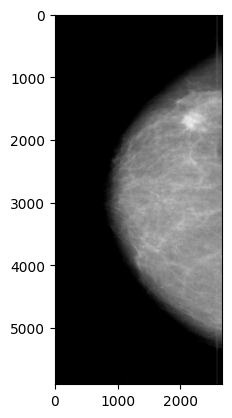

In [34]:
for file  in full_mammogram_images[0:10]:
    full_mammogram_images_show = PIL.Image.open(file)
    gray_img= full_mammogram_images_show.convert("L")
    plt.imshow(gray_img, cmap='gray')

In [35]:
ROI_mask_images = dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path
ROI_mask_images.head()

5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
Name: image_path, dtype: object

In [36]:
ROI_mask_images = ROI_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
ROI_mask_images.head()

5     ../jpeg/1.3.6.1.4.1.9590.100.1.2.1533390529131...
8     ../jpeg/1.3.6.1.4.1.9590.100.1.2.1789947146114...
9     ../jpeg/1.3.6.1.4.1.9590.100.1.2.4118334926123...
14    ../jpeg/1.3.6.1.4.1.9590.100.1.2.2363735487129...
20    ../jpeg/1.3.6.1.4.1.9590.100.1.2.3570080504125...
Name: image_path, dtype: object

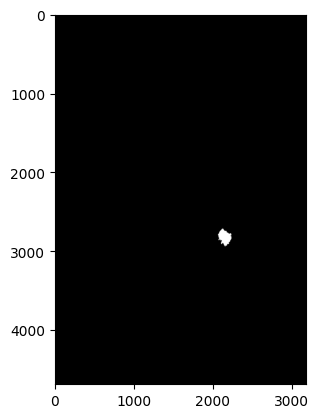

In [37]:
for file  in ROI_mask_images[0:10]:
    ROI_mask_images_show = PIL.Image.open(file)
    gray_img= ROI_mask_images_show.convert("L")
    plt.imshow(gray_img, cmap='gray')

In [38]:
calc_case_df = pd.read_csv('calc_case_description_train_set.csv')

In [39]:
calc_case_df.head(5)

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [40]:
mass_case_df = pd.read_csv('mass_case_description_train_set.csv')

In [41]:
mass_case_df.head(5)

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [42]:
dicom_cleaned_data = dicom_data.copy()
dicom_cleaned_data.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [43]:
dicom_cleaned_data.drop(['PatientBirthDate','AccessionNumber','Columns','ContentDate','ContentTime','PatientSex','PatientBirthDate',
                                                'ReferringPhysicianName','Rows','SOPClassUID','SOPInstanceUID',
                                                'StudyDate','StudyID','StudyInstanceUID','StudyTime','InstanceNumber','SeriesInstanceUID','SeriesNumber'],axis =1, inplace=True) 

In [44]:
dicom_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   file_path                                    10237 non-null  object
 1   image_path                                   10237 non-null  object
 2   BitsAllocated                                10237 non-null  int64 
 3   BitsStored                                   10237 non-null  int64 
 4   BodyPartExamined                             10237 non-null  object
 5   ConversionType                               10237 non-null  object
 6   HighBit                                      10237 non-null  int64 
 7   LargestImagePixelValue                       10237 non-null  int64 
 8   Laterality                                   9671 non-null   object
 9   Modality                                     10237 non-null  object
 10  PatientID 

In [45]:
dicom_cleaned_data.isna().sum()

file_path                                        0
image_path                                       0
BitsAllocated                                    0
BitsStored                                       0
BodyPartExamined                                 0
ConversionType                                   0
HighBit                                          0
LargestImagePixelValue                           0
Laterality                                     566
Modality                                         0
PatientID                                        0
PatientName                                      0
PatientOrientation                               0
PhotometricInterpretation                        0
PixelRepresentation                              0
SamplesPerPixel                                  0
SecondaryCaptureDeviceManufacturer               0
SecondaryCaptureDeviceManufacturerModelName      0
SeriesDescription                              566
SmallestImagePixelValue        

In [46]:
dicom_cleaned_data['SeriesDescription'].fillna(method = 'bfill', axis = 0, inplace=True)
dicom_cleaned_data['Laterality'].fillna(method = 'bfill', axis = 0, inplace=True)

C:\Users\devan\AppData\Local\Temp\ipykernel_18616\1527442165.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dicom_cleaned_data['SeriesDescription'].fillna(method = 'bfill', axis = 0, inplace=True)
C:\Users\devan\AppData\Local\Temp\ipykernel_18616\1527442165.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dicom_cleaned_data['SeriesDescription'].fillna(method = 'bfill', axis = 0, inplace=True)
C:\Users\devan\AppData\Local\Temp\ipyke

In [47]:
dicom_cleaned_data.isna().sum()

file_path                                      0
image_path                                     0
BitsAllocated                                  0
BitsStored                                     0
BodyPartExamined                               0
ConversionType                                 0
HighBit                                        0
LargestImagePixelValue                         0
Laterality                                     0
Modality                                       0
PatientID                                      0
PatientName                                    0
PatientOrientation                             0
PhotometricInterpretation                      0
PixelRepresentation                            0
SamplesPerPixel                                0
SecondaryCaptureDeviceManufacturer             0
SecondaryCaptureDeviceManufacturerModelName    0
SeriesDescription                              0
SmallestImagePixelValue                        0
SpecificCharacterSet

In [48]:
Data_cleaning_1 = calc_case_df.copy()
Data_cleaning_1 = Data_cleaning_1.rename(columns={'calc type':'calc_type'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'calc distribution':'calc_distribution'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'image view':'image_view'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'left or right breast':'left_or_right_breast'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'breast density':'breast_density'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'abnormality type':'abnormality_type'})
Data_cleaning_1['pathology'] = Data_cleaning_1['pathology'].astype('category')
Data_cleaning_1['calc_type'] = Data_cleaning_1['calc_type'].astype('category')
Data_cleaning_1['calc_distribution'] = Data_cleaning_1['calc_distribution'].astype('category')
Data_cleaning_1['abnormality_type'] = Data_cleaning_1['abnormality_type'].astype('category')
Data_cleaning_1['image_view'] = Data_cleaning_1['image_view'].astype('category')
Data_cleaning_1['left_or_right_breast'] = Data_cleaning_1['left_or_right_breast'].astype('category')
Data_cleaning_1.isna().sum()

patient_id                   0
breast_density               0
left_or_right_breast         0
image_view                   0
abnormality id               0
abnormality_type             0
calc_type                   20
calc_distribution          376
assessment                   0
pathology                    0
subtlety                     0
image file path              0
cropped image file path      0
ROI mask file path           0
dtype: int64

In [49]:
Data_cleaning_1['calc_type'].fillna(method = 'bfill', axis = 0, inplace=True) 
Data_cleaning_1['calc_distribution'].fillna(method = 'bfill', axis = 0, inplace=True)
Data_cleaning_1.isna().sum()

C:\Users\devan\AppData\Local\Temp\ipykernel_18616\2703319416.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data_cleaning_1['calc_type'].fillna(method = 'bfill', axis = 0, inplace=True)
C:\Users\devan\AppData\Local\Temp\ipykernel_18616\2703319416.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_cleaning_1['calc_type'].fillna(method = 'bfill', axis = 0, inplace=True)
C:\Users\devan\AppData\Local\Temp\ipykernel_18616\2703319416.

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality id             0
abnormality_type           0
calc_type                  0
calc_distribution          0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [50]:
Data_cleaning_2 = mass_case_df.copy()
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass shape':'mass_shape'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'left or right breast':'left_or_right_breast'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass margins':'mass_margins'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'image view':'image_view'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'abnormality type':'abnormality_type'})
Data_cleaning_2['left_or_right_breast'] = Data_cleaning_2['left_or_right_breast'].astype('category')
Data_cleaning_2['image_view'] = Data_cleaning_2['image_view'].astype('category')
Data_cleaning_2['mass_margins'] = Data_cleaning_2['mass_margins'].astype('category')
Data_cleaning_2['mass_shape'] = Data_cleaning_2['mass_shape'].astype('category')
Data_cleaning_2['abnormality_type'] = Data_cleaning_2['abnormality_type'].astype('category')
Data_cleaning_2['pathology'] = Data_cleaning_2['pathology'].astype('category')
Data_cleaning_2.isna().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality id              0
abnormality_type            0
mass_shape                  4
mass_margins               43
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [54]:
Data_cleaning_2['mass_shape'].fillna(method = 'bfill', axis = 0, inplace=True) 
Data_cleaning_2['mass_margins'].fillna(method = 'bfill', axis = 0, inplace=True) 
Data_cleaning_2.isna().sum()

C:\Users\devan\AppData\Local\Temp\ipykernel_18616\73198642.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_cleaning_2['mass_shape'].fillna(method = 'bfill', axis = 0, inplace=True)
C:\Users\devan\AppData\Local\Temp\ipykernel_18616\73198642.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_cleaning_2['mass_margins'].fillna(method = 'bfill', axis = 0, inplace=True)


patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [60]:
r= pd.DataFrame(dicom_cleaned_data['SeriesDescription'].value_counts())
r= r.reset_index()
r= r.rename(columns={'SeriesDescription':'SeriesDescription_counts', 'index':'SeriesDescription'})
r

,SeriesDescription_counts,count
0,cropped images,3859
1,ROI mask images,3340
2,full mammogram images,3038


In [64]:
f= pd.DataFrame(dicom_cleaned_data['BodyPartExamined'].value_counts())
f= f.reset_index()
f= f.rename(columns={'BodyPartExamined':'BodyPartExamined_counts', 'index':'Breast part Examined'})
f

,BodyPartExamined_counts,count
0,BREAST,9671
1,Left Breast,318
2,Right Breast,248


In [67]:
data_insight_2 = pd.DataFrame({'abnormality':[Data_cleaning_1.abnormality_type[0],Data_cleaning_2.abnormality_type[0]],
                               'counts_of_abnormalties':[len(Data_cleaning_1),len(Data_cleaning_2)]})
data_insight_2

,abnormality,counts_of_abnormalties
0,calcification,1546
1,mass,1318


C:\Users\devan\AppData\Local\Temp\ipykernel_18616\201693931.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




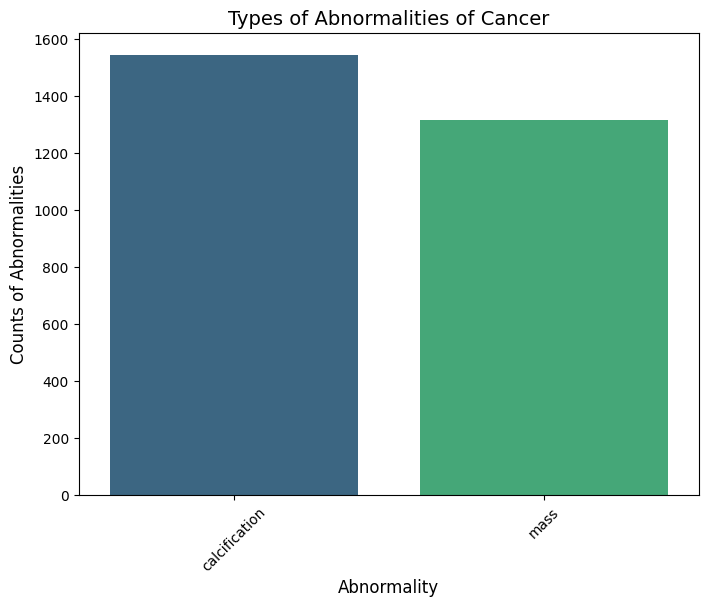

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot bar chart using Matplotlib
plt.figure(figsize=(8,6))
sns.barplot(data=data_insight_2, x='abnormality', y='counts_of_abnormalties', palette="viridis")

plt.title("Types of Abnormalities of Cancer", fontsize=14)
plt.xlabel("Abnormality", fontsize=12)
plt.ylabel("Counts of Abnormalities", fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [70]:
x = Data_cleaning_1.left_or_right_breast.value_counts().RIGHT
y = Data_cleaning_1.left_or_right_breast.value_counts().LEFT
print(x,y)

728 818


In [71]:
data_insight_3 = pd.DataFrame({'left_or_right_breast':['RIGHT','LEFT'] , 'Counts':[x,y]})
data_insight_3

,left_or_right_breast,Counts
0,RIGHT,728
1,LEFT,818


In [72]:
z = pd.DataFrame(Data_cleaning_1['calc_type'].value_counts())
z = z.reset_index()
z= z.rename(columns={'calc_type':'calc_type_counts'})
z

,calc_type_counts,count
0,PLEOMORPHIC,664
1,AMORPHOUS,139
2,PUNCTATE,106
3,LUCENT_CENTER,93
4,VASCULAR,82
5,FINE_LINEAR_BRANCHING,77
6,COARSE,35
7,ROUND_AND_REGULAR-LUCENT_CENTER,33
8,PLEOMORPHIC-FINE_LINEAR_BRANCHING,28
9,ROUND_AND_REGULAR-LUCENT_CENTER-PUNCTATE,24


In [75]:
import pandas as pd

# Load the classification CSV files
calc_df = pd.read_csv("calc_case_description_train_set.csv")
mass_df = pd.read_csv("mass_case_description_train_set.csv")

# Extract patient ID from 'image file path' (text before '/')
calc_df["Extracted_PatientID"] = calc_df["image file path"].apply(lambda x: x.split('/')[0])
mass_df["Extracted_PatientID"] = mass_df["image file path"].apply(lambda x: x.split('/')[0])

# Load the dicom_info.csv
dicom_df = pd.read_csv("dicom_info.csv")

# Merge with dicom_info.csv using PatientID
merged_calc = pd.merge(calc_df, dicom_df, left_on="Extracted_PatientID", right_on="PatientID", how="left")
merged_mass = pd.merge(mass_df, dicom_df, left_on="Extracted_PatientID", right_on="PatientID", how="left")

# Convert pathology column to numerical values (MALIGNANT = 1, BENIGN = 0)
merged_calc["pathology_numeric"] = merged_calc["pathology"].map({"MALIGNANT": 1, "BENIGN": 0})
merged_mass["pathology_numeric"] = merged_mass["pathology"].map({"MALIGNANT": 1, "BENIGN": 0})

# Combine both datasets into one
final_merged_df = pd.concat([merged_calc, merged_mass])

# Save the final merged dataset
final_merged_df.to_csv("merged_patient_data.csv", index=False)

print("Merged CSV saved as 'merged_patient_data.csv'.")


Merged CSV saved as 'merged_patient_data.csv'.


In [77]:
# Load the dataset
ff=final_merged_df.copy()
# Drop unnecessary columns
columns_to_drop = ['StudyID', 'StudyInstanceUID', 'SpecificCharacterSet', 'StudyDate', 'StudyTime']
final_merged_df = final_merged_df.drop(columns=[col for col in columns_to_drop if col in final_merged_df.columns], errors='ignore')

# Check for missing values
missing_values = final_merged_df.isnull().sum()

# Convert categorical columns to numerical if necessary
categorical_columns = ['abnormality type', 'calc type', 'calc distribution', 'mass shape', 'mass margins']
df_encoded = pd.get_dummies(final_merged_df, columns=[col for col in categorical_columns if col in final_merged_df.columns], drop_first=True)

# Show summary of missing values after processing
missing_values

patient_id                                        0
breast density                                 1318
left or right breast                              0
image view                                        0
abnormality id                                    0
abnormality type                                  0
calc type                                      1338
calc distribution                              1694
assessment                                        0
pathology                                         0
subtlety                                          0
image file path                                   0
cropped image file path                           0
ROI mask file path                                0
Extracted_PatientID                               0
file_path                                         0
image_path                                        0
AccessionNumber                                2864
BitsAllocated                                     0
BitsStored  

In [78]:
final_merged_df

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,...,SecondaryCaptureDeviceManufacturer,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,pathology_numeric,breast_density,mass shape,mass margins
0,P_00005,3.0,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,...,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.474143160103683865197...,1,0,1.0,NaN,NaN,NaN
1,P_00005,3.0,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,...,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.250596608311207922527...,1,0,1.0,NaN,NaN,NaN
2,P_00007,4.0,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,...,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.228699627313487111012...,1,0,0.0,NaN,NaN,NaN
3,P_00007,4.0,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,...,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.104743410411133110629...,1,0,0.0,NaN,NaN,NaN
4,P_00008,1.0,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,...,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.406725628213826290127...,1,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,NaN,RIGHT,MLO,1,mass,NaN,NaN,3,MALIGNANT,...,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.399742535611893168217...,1,0,1.0,2.0,IRREGULAR,ILL_DEFINED
1314,P_02079,NaN,RIGHT,CC,1,mass,NaN,NaN,3,MALIGNANT,...,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.174087037012311934636...,1,0,1.0,2.0,ROUND,SPICULATED
1315,P_02079,NaN,RIGHT,MLO,1,mass,NaN,NaN,3,MALIGNANT,...,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.412558050811722685411...,1,0,1.0,2.0,ROUND,SPICULATED
1316,P_02092,NaN,LEFT,CC,1,mass,NaN,NaN,3,MALIGNANT,...,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.150311422512072857220...,1,0,1.0,2.0,IRREGULAR,SPICULATED


In [79]:
ff

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,...,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime,pathology_numeric,breast_density,mass shape,mass margins
0,P_00005,3.0,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,...,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.408909860712120272633...,161037.0,1.0,NaN,NaN,NaN
1,P_00005,3.0,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,...,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.427517897311902339923...,161039.0,1.0,NaN,NaN,NaN
2,P_00007,4.0,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,...,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.201322325113694962619...,161042.0,0.0,NaN,NaN,NaN
3,P_00007,4.0,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,...,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.370479499712916693322...,161045.0,0.0,NaN,NaN,NaN
4,P_00008,1.0,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,...,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.162256682111885666305...,161048.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,NaN,RIGHT,MLO,1,mass,NaN,NaN,3,MALIGNANT,...,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.964042733114858458386...,194200.0,1.0,2.0,IRREGULAR,ILL_DEFINED
1314,P_02079,NaN,RIGHT,CC,1,mass,NaN,NaN,3,MALIGNANT,...,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.268797464411367674311...,194206.0,1.0,2.0,ROUND,SPICULATED
1315,P_02079,NaN,RIGHT,MLO,1,mass,NaN,NaN,3,MALIGNANT,...,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.791687062125620465047...,194209.0,1.0,2.0,ROUND,SPICULATED
1316,P_02092,NaN,LEFT,CC,1,mass,NaN,NaN,3,MALIGNANT,...,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.420341693811920799600...,194217.0,1.0,2.0,IRREGULAR,SPICULATED


In [82]:
ff["breast_density"].value_counts()
ff["breast_density"].isna().sum()

np.int64(1546)

In [83]:
ff["left or right breast"].value_counts()
ff["left or right breast"].isna().sum()

np.int64(0)

In [84]:
ff["image view"].value_counts()
ff["image view"].isna().sum()

np.int64(0)

In [85]:
ff["abnormality id"].value_counts()
ff["abnormality id"].isna().sum()

np.int64(0)

In [86]:
ff["abnormality id"].value_counts()

abnormality id
1    2388
2     287
3     111
4      42
5      22
6      12
7       2
Name: count, dtype: int64

In [88]:
ff["abnormality type"].isna().sum()

np.int64(0)

In [89]:
ff["abnormality type"].value_counts()

abnormality type
calcification    1546
mass             1318
Name: count, dtype: int64

In [90]:
ff["calc type"].value_counts()

calc type
PLEOMORPHIC                                                 664
AMORPHOUS                                                   138
PUNCTATE                                                    106
LUCENT_CENTER                                                93
VASCULAR                                                     82
FINE_LINEAR_BRANCHING                                        77
COARSE                                                       35
ROUND_AND_REGULAR-LUCENT_CENTER                              31
PLEOMORPHIC-FINE_LINEAR_BRANCHING                            28
ROUND_AND_REGULAR-LUCENT_CENTER-PUNCTATE                     24
ROUND_AND_REGULAR-EGGSHELL                                   23
PUNCTATE-PLEOMORPHIC                                         21
DYSTROPHIC                                                   20
LUCENT_CENTERED                                              18
ROUND_AND_REGULAR                                            17
ROUND_AND_REGULAR-LUCENT_CENTE

In [91]:
ff["calc type"].isna().sum()

np.int64(1338)

In [92]:
final_merged_df=ff.copy()

In [93]:
final_merged_df

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,...,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime,pathology_numeric,breast_density,mass shape,mass margins
0,P_00005,3.0,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,...,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.408909860712120272633...,161037.0,1.0,NaN,NaN,NaN
1,P_00005,3.0,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,...,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.427517897311902339923...,161039.0,1.0,NaN,NaN,NaN
2,P_00007,4.0,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,...,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.201322325113694962619...,161042.0,0.0,NaN,NaN,NaN
3,P_00007,4.0,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,...,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.370479499712916693322...,161045.0,0.0,NaN,NaN,NaN
4,P_00008,1.0,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,...,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.162256682111885666305...,161048.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,NaN,RIGHT,MLO,1,mass,NaN,NaN,3,MALIGNANT,...,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.964042733114858458386...,194200.0,1.0,2.0,IRREGULAR,ILL_DEFINED
1314,P_02079,NaN,RIGHT,CC,1,mass,NaN,NaN,3,MALIGNANT,...,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.268797464411367674311...,194206.0,1.0,2.0,ROUND,SPICULATED
1315,P_02079,NaN,RIGHT,MLO,1,mass,NaN,NaN,3,MALIGNANT,...,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.791687062125620465047...,194209.0,1.0,2.0,ROUND,SPICULATED
1316,P_02092,NaN,LEFT,CC,1,mass,NaN,NaN,3,MALIGNANT,...,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.420341693811920799600...,194217.0,1.0,2.0,IRREGULAR,SPICULATED


In [97]:
tt=pd.read_csv("merged_patient_data.csv")

In [99]:
tt

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,...,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime,pathology_numeric,breast_density,mass shape,mass margins
0,P_00005,3.0,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,...,0,ISO_IR 100,20160807,DDSM,1.3.6.1.4.1.9590.100.1.2.408909860712120272633...,161037,1.0,NaN,NaN,NaN
1,P_00005,3.0,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,...,0,ISO_IR 100,20160807,DDSM,1.3.6.1.4.1.9590.100.1.2.427517897311902339923...,161039,1.0,NaN,NaN,NaN
2,P_00007,4.0,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,...,0,ISO_IR 100,20160807,DDSM,1.3.6.1.4.1.9590.100.1.2.201322325113694962619...,161042,0.0,NaN,NaN,NaN
3,P_00007,4.0,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,...,0,ISO_IR 100,20160807,DDSM,1.3.6.1.4.1.9590.100.1.2.370479499712916693322...,161045,0.0,NaN,NaN,NaN
4,P_00008,1.0,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,...,0,ISO_IR 100,20160807,DDSM,1.3.6.1.4.1.9590.100.1.2.162256682111885666305...,161048,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,P_02033,NaN,RIGHT,MLO,1,mass,NaN,NaN,3,MALIGNANT,...,0,ISO_IR 100,20160720,DDSM,1.3.6.1.4.1.9590.100.1.2.964042733114858458386...,194200,1.0,2.0,IRREGULAR,ILL_DEFINED
2860,P_02079,NaN,RIGHT,CC,1,mass,NaN,NaN,3,MALIGNANT,...,0,ISO_IR 100,20160720,DDSM,1.3.6.1.4.1.9590.100.1.2.268797464411367674311...,194206,1.0,2.0,ROUND,SPICULATED
2861,P_02079,NaN,RIGHT,MLO,1,mass,NaN,NaN,3,MALIGNANT,...,0,ISO_IR 100,20160720,DDSM,1.3.6.1.4.1.9590.100.1.2.791687062125620465047...,194209,1.0,2.0,ROUND,SPICULATED
2862,P_02092,NaN,LEFT,CC,1,mass,NaN,NaN,3,MALIGNANT,...,0,ISO_IR 100,20160720,DDSM,1.3.6.1.4.1.9590.100.1.2.420341693811920799600...,194217,1.0,2.0,IRREGULAR,SPICULATED


In [101]:
final_merged_df=final_merged_df.drop(columns=["SmallestImagePixelValue", "SpecificCharacterSet","StudyDate","StudyID","StudyTime","pathology_numeric","breast_density"])

In [102]:
final_merged_df

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,...,SOPInstanceUID,SamplesPerPixel,SecondaryCaptureDeviceManufacturer,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,StudyInstanceUID,mass shape,mass margins
0,P_00005,3.0,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,...,1.3.6.1.4.1.9590.100.1.2.378776769711002686209...,1,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.474143160103683865197...,1,1.3.6.1.4.1.9590.100.1.2.408909860712120272633...,NaN,NaN
1,P_00005,3.0,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,...,1.3.6.1.4.1.9590.100.1.2.344560194211255710311...,1,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.250596608311207922527...,1,1.3.6.1.4.1.9590.100.1.2.427517897311902339923...,NaN,NaN
2,P_00007,4.0,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,...,1.3.6.1.4.1.9590.100.1.2.289523209011022171720...,1,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.228699627313487111012...,1,1.3.6.1.4.1.9590.100.1.2.201322325113694962619...,NaN,NaN
3,P_00007,4.0,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,...,1.3.6.1.4.1.9590.100.1.2.140012230311051260141...,1,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.104743410411133110629...,1,1.3.6.1.4.1.9590.100.1.2.370479499712916693322...,NaN,NaN
4,P_00008,1.0,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,...,1.3.6.1.4.1.9590.100.1.2.289949632412471538239...,1,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.406725628213826290127...,1,1.3.6.1.4.1.9590.100.1.2.162256682111885666305...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,NaN,RIGHT,MLO,1,mass,NaN,NaN,3,MALIGNANT,...,1.3.6.1.4.1.9590.100.1.2.169934396512333911035...,1,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.399742535611893168217...,1,1.3.6.1.4.1.9590.100.1.2.964042733114858458386...,IRREGULAR,ILL_DEFINED
1314,P_02079,NaN,RIGHT,CC,1,mass,NaN,NaN,3,MALIGNANT,...,1.3.6.1.4.1.9590.100.1.2.146784786310784152122...,1,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.174087037012311934636...,1,1.3.6.1.4.1.9590.100.1.2.268797464411367674311...,ROUND,SPICULATED
1315,P_02079,NaN,RIGHT,MLO,1,mass,NaN,NaN,3,MALIGNANT,...,1.3.6.1.4.1.9590.100.1.2.142825213810212537939...,1,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.412558050811722685411...,1,1.3.6.1.4.1.9590.100.1.2.791687062125620465047...,ROUND,SPICULATED
1316,P_02092,NaN,LEFT,CC,1,mass,NaN,NaN,3,MALIGNANT,...,1.3.6.1.4.1.9590.100.1.2.219600656013444295716...,1,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.150311422512072857220...,1,1.3.6.1.4.1.9590.100.1.2.420341693811920799600...,IRREGULAR,SPICULATED


In [103]:
final_merged_df.isna().sum()

patient_id                                        0
breast density                                 1318
left or right breast                              0
image view                                        0
abnormality id                                    0
abnormality type                                  0
calc type                                      1338
calc distribution                              1694
assessment                                        0
pathology                                         0
subtlety                                          0
image file path                                   0
cropped image file path                           0
ROI mask file path                                0
Extracted_PatientID                               0
file_path                                         0
image_path                                        0
AccessionNumber                                2864
BitsAllocated                                     0
BitsStored  

In [105]:
tt=tt.drop(columns=["SmallestImagePixelValue", "SpecificCharacterSet","StudyDate","StudyID","StudyTime","pathology_numeric","breast_density"])

In [106]:
tt

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,...,SOPInstanceUID,SamplesPerPixel,SecondaryCaptureDeviceManufacturer,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,StudyInstanceUID,mass shape,mass margins
0,P_00005,3.0,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,...,1.3.6.1.4.1.9590.100.1.2.378776769711002686209...,1,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.474143160103683865197...,1,1.3.6.1.4.1.9590.100.1.2.408909860712120272633...,NaN,NaN
1,P_00005,3.0,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,...,1.3.6.1.4.1.9590.100.1.2.344560194211255710311...,1,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.250596608311207922527...,1,1.3.6.1.4.1.9590.100.1.2.427517897311902339923...,NaN,NaN
2,P_00007,4.0,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,...,1.3.6.1.4.1.9590.100.1.2.289523209011022171720...,1,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.228699627313487111012...,1,1.3.6.1.4.1.9590.100.1.2.201322325113694962619...,NaN,NaN
3,P_00007,4.0,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,...,1.3.6.1.4.1.9590.100.1.2.140012230311051260141...,1,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.104743410411133110629...,1,1.3.6.1.4.1.9590.100.1.2.370479499712916693322...,NaN,NaN
4,P_00008,1.0,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,...,1.3.6.1.4.1.9590.100.1.2.289949632412471538239...,1,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.406725628213826290127...,1,1.3.6.1.4.1.9590.100.1.2.162256682111885666305...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,P_02033,NaN,RIGHT,MLO,1,mass,NaN,NaN,3,MALIGNANT,...,1.3.6.1.4.1.9590.100.1.2.169934396512333911035...,1,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.399742535611893168217...,1,1.3.6.1.4.1.9590.100.1.2.964042733114858458386...,IRREGULAR,ILL_DEFINED
2860,P_02079,NaN,RIGHT,CC,1,mass,NaN,NaN,3,MALIGNANT,...,1.3.6.1.4.1.9590.100.1.2.146784786310784152122...,1,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.174087037012311934636...,1,1.3.6.1.4.1.9590.100.1.2.268797464411367674311...,ROUND,SPICULATED
2861,P_02079,NaN,RIGHT,MLO,1,mass,NaN,NaN,3,MALIGNANT,...,1.3.6.1.4.1.9590.100.1.2.142825213810212537939...,1,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.412558050811722685411...,1,1.3.6.1.4.1.9590.100.1.2.791687062125620465047...,ROUND,SPICULATED
2862,P_02092,NaN,LEFT,CC,1,mass,NaN,NaN,3,MALIGNANT,...,1.3.6.1.4.1.9590.100.1.2.219600656013444295716...,1,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.150311422512072857220...,1,1.3.6.1.4.1.9590.100.1.2.420341693811920799600...,IRREGULAR,SPICULATED


In [107]:
final_merged_df=final_merged_df.drop(columns=[
     'AccessionNumber', 'BitsAllocated', 'BitsStored', 'BodyPartExamined', 'Columns', 'ContentDate', 'ContentTime',
    'ConversionType', 'HighBit', 'InstanceNumber', 'LargestImagePixelValue', 'Laterality', 'Modality', 'PatientBirthDate',
    'PatientID', 'PatientName', 'PatientOrientation', 'PatientSex', 'PhotometricInterpretation', 'PixelRepresentation',
    'ReferringPhysicianName', 'Rows', 'SOPClassUID', 'SOPInstanceUID', 'SamplesPerPixel', 'SecondaryCaptureDeviceManufacturer',
    'SecondaryCaptureDeviceManufacturerModelName', 'SeriesDescription', 'SeriesInstanceUID', 'SeriesNumber', 'StudyInstanceUID',
    'ROI mask file path', 'cropped image file path', 'file_path', 'left or right breast'
])

In [108]:
final_merged_df

,patient_id,breast density,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,Extracted_PatientID,image_path,mass shape,mass margins
0,P_00005,3.0,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.474143...,NaN,NaN
1,P_00005,3.0,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.250596...,NaN,NaN
2,P_00007,4.0,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.228699...,NaN,NaN
3,P_00007,4.0,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.104743...,NaN,NaN
4,P_00008,1.0,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.406725...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,NaN,MLO,1,mass,NaN,NaN,3,MALIGNANT,4,Mass-Training_P_02033_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02033_RIGHT_MLO,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.399742...,IRREGULAR,ILL_DEFINED
1314,P_02079,NaN,CC,1,mass,NaN,NaN,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_02079_RIGHT_CC,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.174087...,ROUND,SPICULATED
1315,P_02079,NaN,MLO,1,mass,NaN,NaN,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02079_RIGHT_MLO,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.412558...,ROUND,SPICULATED
1316,P_02092,NaN,CC,1,mass,NaN,NaN,3,MALIGNANT,2,Mass-Training_P_02092_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_02092_LEFT_CC,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.150311...,IRREGULAR,SPICULATED


In [109]:
final_merged_df=final_merged_df.drop(columns=['Extracted_PatientID'])

In [110]:
final_merged_df=final_merged_df.drop(columns=['image file path'])

In [111]:
final_merged_df

,patient_id,breast density,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image_path,mass shape,mass margins
0,P_00005,3.0,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.474143...,NaN,NaN
1,P_00005,3.0,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.250596...,NaN,NaN
2,P_00007,4.0,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.228699...,NaN,NaN
3,P_00007,4.0,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.104743...,NaN,NaN
4,P_00008,1.0,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.406725...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,NaN,MLO,1,mass,NaN,NaN,3,MALIGNANT,4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.399742...,IRREGULAR,ILL_DEFINED
1314,P_02079,NaN,CC,1,mass,NaN,NaN,3,MALIGNANT,5,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.174087...,ROUND,SPICULATED
1315,P_02079,NaN,MLO,1,mass,NaN,NaN,3,MALIGNANT,5,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.412558...,ROUND,SPICULATED
1316,P_02092,NaN,CC,1,mass,NaN,NaN,3,MALIGNANT,2,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.150311...,IRREGULAR,SPICULATED


In [113]:
final_merged_df['breast density'].value_counts()

breast density
3.0    539
2.0    501
4.0    331
1.0    175
Name: count, dtype: int64

In [114]:
final_merged_df['image view'].value_counts()

image view
MLO    1518
CC     1346
Name: count, dtype: int64

In [115]:
final_merged_df['abnormality type'].value_counts()

abnormality type
calcification    1546
mass             1318
Name: count, dtype: int64

In [118]:
final_merged_df.columns

Index(['patient_id', 'breast density', 'image view', 'abnormality id',
       'abnormality type', 'calc type', 'calc distribution', 'assessment',
       'pathology', 'subtlety', 'image_path', 'mass shape', 'mass margins'],
      dtype='object')

In [119]:
final_merged_df['image view'].isna().sum()

np.int64(0)

In [120]:
final_merged_df['image view']=final_merged_df['image view'].map(
    {
    'MLO':1,
    'CC': 0
    }
)

In [121]:
final_merged_df

,patient_id,breast density,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image_path,mass shape,mass margins
0,P_00005,3.0,0,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.474143...,NaN,NaN
1,P_00005,3.0,1,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.250596...,NaN,NaN
2,P_00007,4.0,0,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.228699...,NaN,NaN
3,P_00007,4.0,1,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.104743...,NaN,NaN
4,P_00008,1.0,0,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.406725...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,NaN,1,1,mass,NaN,NaN,3,MALIGNANT,4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.399742...,IRREGULAR,ILL_DEFINED
1314,P_02079,NaN,0,1,mass,NaN,NaN,3,MALIGNANT,5,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.174087...,ROUND,SPICULATED
1315,P_02079,NaN,1,1,mass,NaN,NaN,3,MALIGNANT,5,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.412558...,ROUND,SPICULATED
1316,P_02092,NaN,0,1,mass,NaN,NaN,3,MALIGNANT,2,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.150311...,IRREGULAR,SPICULATED


In [122]:
final_merged_df['pathology'].value_counts()

pathology
MALIGNANT                  1181
BENIGN                     1105
BENIGN_WITHOUT_CALLBACK     578
Name: count, dtype: int64

In [123]:
final_merged_df['pathology'].isna().sum()

np.int64(0)

In [124]:
final_merged_df['pathology']=final_merged_df['pathology'].map(
    {
    'MALIGNANT':2,
    'BENIGN': 1,
     'BENIGN_WITHOUT_CALLBACK':0
    }
)

In [125]:
final_merged_df

,patient_id,breast density,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image_path,mass shape,mass margins
0,P_00005,3.0,0,1,calcification,AMORPHOUS,CLUSTERED,3,2,3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.474143...,NaN,NaN
1,P_00005,3.0,1,1,calcification,AMORPHOUS,CLUSTERED,3,2,3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.250596...,NaN,NaN
2,P_00007,4.0,0,1,calcification,PLEOMORPHIC,LINEAR,4,1,4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.228699...,NaN,NaN
3,P_00007,4.0,1,1,calcification,PLEOMORPHIC,LINEAR,4,1,4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.104743...,NaN,NaN
4,P_00008,1.0,0,1,calcification,NaN,REGIONAL,2,0,3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.406725...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,NaN,1,1,mass,NaN,NaN,3,2,4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.399742...,IRREGULAR,ILL_DEFINED
1314,P_02079,NaN,0,1,mass,NaN,NaN,3,2,5,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.174087...,ROUND,SPICULATED
1315,P_02079,NaN,1,1,mass,NaN,NaN,3,2,5,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.412558...,ROUND,SPICULATED
1316,P_02092,NaN,0,1,mass,NaN,NaN,3,2,2,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.150311...,IRREGULAR,SPICULATED


In [126]:
backup=final_merged_df

In [127]:
backup

,patient_id,breast density,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image_path,mass shape,mass margins
0,P_00005,3.0,0,1,calcification,AMORPHOUS,CLUSTERED,3,2,3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.474143...,NaN,NaN
1,P_00005,3.0,1,1,calcification,AMORPHOUS,CLUSTERED,3,2,3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.250596...,NaN,NaN
2,P_00007,4.0,0,1,calcification,PLEOMORPHIC,LINEAR,4,1,4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.228699...,NaN,NaN
3,P_00007,4.0,1,1,calcification,PLEOMORPHIC,LINEAR,4,1,4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.104743...,NaN,NaN
4,P_00008,1.0,0,1,calcification,NaN,REGIONAL,2,0,3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.406725...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,NaN,1,1,mass,NaN,NaN,3,2,4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.399742...,IRREGULAR,ILL_DEFINED
1314,P_02079,NaN,0,1,mass,NaN,NaN,3,2,5,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.174087...,ROUND,SPICULATED
1315,P_02079,NaN,1,1,mass,NaN,NaN,3,2,5,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.412558...,ROUND,SPICULATED
1316,P_02092,NaN,0,1,mass,NaN,NaN,3,2,2,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.150311...,IRREGULAR,SPICULATED


In [129]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_columns = ['abnormality type', 'calc type', 'calc distribution', 'mass shape', 'mass margins']

# Apply Label Encoding with NaN handling
label_encoders = {}  # Store encoders for future use
for col in categorical_columns:
    final_merged_df[col] = final_merged_df[col].fillna("Unknown")  # Replace NaN with "Unknown"
    le = LabelEncoder()
    final_merged_df[col] = le.fit_transform(final_merged_df[col].astype(str))  # Convert to string before encoding
    label_encoders[col] = le  # Save the encoder if needed for inverse transformation later


In [130]:
final_merged_df

,patient_id,breast density,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image_path,mass shape,mass margins
0,P_00005,3.0,0,1,0,0,0,3,2,3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.474143...,18,15
1,P_00005,3.0,1,1,0,0,0,3,2,3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.250596...,18,15
2,P_00007,4.0,0,1,0,18,4,4,1,4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.228699...,18,15
3,P_00007,4.0,1,1,0,18,4,4,1,4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.104743...,18,15
4,P_00008,1.0,0,1,0,41,6,2,0,3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.406725...,18,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,NaN,1,1,1,41,9,3,2,4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.399742...,3,4
1314,P_02079,NaN,0,1,1,41,9,3,2,5,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.174087...,14,14
1315,P_02079,NaN,1,1,1,41,9,3,2,5,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.412558...,14,14
1316,P_02092,NaN,0,1,1,41,9,3,2,2,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.150311...,3,14


In [131]:
final_merged_df['breast density'].fillna(final_merged_df['breast density'].mode()[0], inplace=True)


C:\Users\devan\AppData\Local\Temp\ipykernel_18616\1505583823.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [132]:
final_merged_df

,patient_id,breast density,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image_path,mass shape,mass margins
0,P_00005,3.0,0,1,0,0,0,3,2,3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.474143...,18,15
1,P_00005,3.0,1,1,0,0,0,3,2,3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.250596...,18,15
2,P_00007,4.0,0,1,0,18,4,4,1,4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.228699...,18,15
3,P_00007,4.0,1,1,0,18,4,4,1,4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.104743...,18,15
4,P_00008,1.0,0,1,0,41,6,2,0,3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.406725...,18,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,3.0,1,1,1,41,9,3,2,4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.399742...,3,4
1314,P_02079,3.0,0,1,1,41,9,3,2,5,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.174087...,14,14
1315,P_02079,3.0,1,1,1,41,9,3,2,5,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.412558...,14,14
1316,P_02092,3.0,0,1,1,41,9,3,2,2,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.150311...,3,14


In [133]:
final_merged_df.to_csv('final_data.csv')

In [134]:
final_merged_df.drop(columns=["patient_id"])

,breast density,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image_path,mass shape,mass margins
0,3.0,0,1,0,0,0,3,2,3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.474143...,18,15
1,3.0,1,1,0,0,0,3,2,3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.250596...,18,15
2,4.0,0,1,0,18,4,4,1,4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.228699...,18,15
3,4.0,1,1,0,18,4,4,1,4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.104743...,18,15
4,1.0,0,1,0,41,6,2,0,3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.406725...,18,15
...,...,...,...,...,...,...,...,...,...,...,...,...
1313,3.0,1,1,1,41,9,3,2,4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.399742...,3,4
1314,3.0,0,1,1,41,9,3,2,5,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.174087...,14,14
1315,3.0,1,1,1,41,9,3,2,5,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.412558...,14,14
1316,3.0,0,1,1,41,9,3,2,2,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.150311...,3,14


In [135]:
final_merged_df=final_merged_df.drop(columns=["patient_id"])

In [136]:
final_merged_df

,breast density,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image_path,mass shape,mass margins
0,3.0,0,1,0,0,0,3,2,3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.474143...,18,15
1,3.0,1,1,0,0,0,3,2,3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.250596...,18,15
2,4.0,0,1,0,18,4,4,1,4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.228699...,18,15
3,4.0,1,1,0,18,4,4,1,4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.104743...,18,15
4,1.0,0,1,0,41,6,2,0,3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.406725...,18,15
...,...,...,...,...,...,...,...,...,...,...,...,...
1313,3.0,1,1,1,41,9,3,2,4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.399742...,3,4
1314,3.0,0,1,1,41,9,3,2,5,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.174087...,14,14
1315,3.0,1,1,1,41,9,3,2,5,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.412558...,14,14
1316,3.0,0,1,1,41,9,3,2,2,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.150311...,3,14


In [137]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
import os
import cv2

In [138]:
df=final_merged_df.copy()

In [139]:
df

,breast density,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image_path,mass shape,mass margins
0,3.0,0,1,0,0,0,3,2,3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.474143...,18,15
1,3.0,1,1,0,0,0,3,2,3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.250596...,18,15
2,4.0,0,1,0,18,4,4,1,4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.228699...,18,15
3,4.0,1,1,0,18,4,4,1,4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.104743...,18,15
4,1.0,0,1,0,41,6,2,0,3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.406725...,18,15
...,...,...,...,...,...,...,...,...,...,...,...,...
1313,3.0,1,1,1,41,9,3,2,4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.399742...,3,4
1314,3.0,0,1,1,41,9,3,2,5,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.174087...,14,14
1315,3.0,1,1,1,41,9,3,2,5,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.412558...,14,14
1316,3.0,0,1,1,41,9,3,2,2,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.150311...,3,14


In [141]:
df['pathology_numeric'] = df['pathology'].astype(str)  

In [142]:
df[df['image_path'].apply(lambda x: os.path.exists(x))]

,breast density,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image_path,mass shape,mass margins,pathology_numeric


In [144]:
df.to_csv('hehe.csv',index=False)

In [145]:
df=pd.read_csv('hehe.csv')

In [146]:
df

,breast density,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image_path,mass shape,mass margins,pathology_numeric
0,3,0,1,0,0,0,3,2,3,../jpeg/1.3.6.1.4.1.9590.100.1.2.4741431601036...,18,15,2
1,3,1,1,0,0,0,3,2,3,../jpeg/1.3.6.1.4.1.9590.100.1.2.2505966083112...,18,15,2
2,4,0,1,0,18,4,4,1,4,../jpeg/1.3.6.1.4.1.9590.100.1.2.2286996273134...,18,15,1
3,4,1,1,0,18,4,4,1,4,../jpeg/1.3.6.1.4.1.9590.100.1.2.1047434104111...,18,15,1
4,1,0,1,0,41,6,2,0,3,../jpeg/1.3.6.1.4.1.9590.100.1.2.4067256282138...,18,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,3,1,1,1,41,9,3,2,4,../jpeg/1.3.6.1.4.1.9590.100.1.2.3997425356118...,3,4,2
2860,3,0,1,1,41,9,3,2,5,../jpeg/1.3.6.1.4.1.9590.100.1.2.1740870370123...,14,14,2
2861,3,1,1,1,41,9,3,2,5,../jpeg/1.3.6.1.4.1.9590.100.1.2.4125580508117...,14,14,2
2862,3,0,1,1,41,9,3,2,2,../jpeg/1.3.6.1.4.1.9590.100.1.2.1503114225120...,3,14,2


In [147]:
df[df['image_path'].apply(lambda x: os.path.exists(x))]

,breast density,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image_path,mass shape,mass margins,pathology_numeric
0,3,0,1,0,0,0,3,2,3,../jpeg/1.3.6.1.4.1.9590.100.1.2.4741431601036...,18,15,2
1,3,1,1,0,0,0,3,2,3,../jpeg/1.3.6.1.4.1.9590.100.1.2.2505966083112...,18,15,2
2,4,0,1,0,18,4,4,1,4,../jpeg/1.3.6.1.4.1.9590.100.1.2.2286996273134...,18,15,1
3,4,1,1,0,18,4,4,1,4,../jpeg/1.3.6.1.4.1.9590.100.1.2.1047434104111...,18,15,1
4,1,0,1,0,41,6,2,0,3,../jpeg/1.3.6.1.4.1.9590.100.1.2.4067256282138...,18,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,3,1,1,1,41,9,3,2,4,../jpeg/1.3.6.1.4.1.9590.100.1.2.3997425356118...,3,4,2
2860,3,0,1,1,41,9,3,2,5,../jpeg/1.3.6.1.4.1.9590.100.1.2.1740870370123...,14,14,2
2861,3,1,1,1,41,9,3,2,5,../jpeg/1.3.6.1.4.1.9590.100.1.2.4125580508117...,14,14,2
2862,3,0,1,1,41,9,3,2,2,../jpeg/1.3.6.1.4.1.9590.100.1.2.1503114225120...,3,14,2


In [148]:
IMG_SIZE = 224  # Standard size for EfficientNet

def load_and_preprocess_image(img_path):
    try:
        image = cv2.imread(img_path)  # Load image
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))  # Resize to EfficientNet input size
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
        image = image / 255.0  # Normalize pixel values
        return image
    except:
        return np.zeros((IMG_SIZE, IMG_SIZE, 3))  # If image fails, return a blank image

# Load all images from the dataset
X = np.array([load_and_preprocess_image(img) for img in df['image_path'].values])
y = df['pathology'].values  # Labels


In [149]:
X

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.01176471, 0.01176471, 0.01176471],
         [0.10588235, 0.10588235, 0.10588235],
         [0.17647059, 0.17647059, 0.17647059]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.02352941, 0.02352941, 0.02352941],
         [0.10196078, 0.10196078, 0.10196078],
         [0.17254902, 0.17254902, 0.17254902]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.00784314, 0.00784314, 0.00784314],
         [0.09411765, 0.09411765, 0.09411765],
         [0.17254902, 0.17254902, 0.17254902]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [152]:
(df['pathology']==df['pathology_numeric']).value_counts()

True    2864
Name: count, dtype: int64

In [154]:
X.shape

(2864, 224, 224, 3)

In [155]:
y.shape

(2864,)

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [157]:
X_train

array([[[[0.21960784, 0.21960784, 0.21960784],
         [0.17254902, 0.17254902, 0.17254902],
         [0.1372549 , 0.1372549 , 0.1372549 ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.18823529, 0.18823529, 0.18823529],
         [0.14901961, 0.14901961, 0.14901961],
         [0.12156863, 0.12156863, 0.12156863],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.16078431, 0.16078431, 0.16078431],
         [0.12941176, 0.12941176, 0.12941176],
         [0.10196078, 0.10196078, 0.10196078],
         ...,
         [0.80784314, 0.80784314, 0.80784314],
         [0.99607843, 0.99607843, 0.99607843],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.09411765, 0.09411765, 0.09411765],
         [0.0745098 , 0.0745098 , 0.0745098 ]

In [161]:
X_test.shape

(704, 93)

In [162]:
X_test = np.array(X_test)  # Convert DataFrame to NumPy array
print(X_test.shape)


(704, 93)


In [159]:
y_train

array([0, 0, 2, ..., 2, 0, 1])

In [160]:
y_test

0      1
1      1
2      1
3      1
4      0
      ..
699    1
700    0
701    0
702    1
703    1
Name: pathology, Length: 704, dtype: int64

In [163]:
X_val

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.65098039, 0.65098039, 0.65098039],
         [0.63921569, 0.63921569, 0.63921569],
         [0.6627451 , 0.6627451 , 0.6627451 ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.67058824, 0.67058824, 0.67058824],
         [0.72156863, 0.72156863, 0.72156863]

In [164]:
     y_val

array([2, 1, 2, 0, 2, 2, 1, 1, 1, 0, 1, 2, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0,
       1, 0, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2,
       2, 1, 0, 0, 1, 0, 1, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0, 0, 1, 0, 2, 2,
       1, 2, 2, 1, 1, 1, 0, 2, 0, 1, 2, 1, 2, 1, 0, 1, 2, 2, 1, 1, 1, 0,
       2, 2, 1, 2, 2, 0, 1, 2, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 0, 1,
       2, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 2, 1, 1, 2, 1, 2, 1, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1,
       0, 0, 1, 2, 0, 1, 0, 1, 1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 1,
       2, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 2,
       2, 2, 1, 1, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 1, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 0, 1, 2, 2,
       2, 0, 2, 0, 1, 1, 2, 1, 1, 2, 2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1,
       2, 2, 1, 2, 0, 1, 1, 0, 2, 2, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1,
       0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 2, 0, 1, 1,

In [165]:
y_test

0      1
1      1
2      1
3      1
4      0
      ..
699    1
700    0
701    0
702    1
703    1
Name: pathology, Length: 704, dtype: int64

In [166]:
y_train

array([0, 0, 2, ..., 2, 0, 1])

In [167]:
y_test.shape

(704,)

In [168]:
y_val.shape

(573,)

In [169]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model for transfer learning

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(set(y)), activation='softmax')(x)  # Adjust for classes

model = Model(inputs=base_model.input, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step 


In [170]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.3851 - loss: 1.7476 - val_accuracy: 0.4119 - val_loss: 1.0577
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.3762 - loss: 1.0785 - val_accuracy: 0.4119 - val_loss: 1.0771
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.3885 - loss: 1.0825 - val_accuracy: 0.4119 - val_loss: 1.0670
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.4132 - loss: 1.0820 - val_accuracy: 0.4119 - val_loss: 1.0590
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.4138 - loss: 1.0799 - val_accuracy: 0.4119 - val_loss: 1.0708
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.4236 - loss: 1.0793 - val_accuracy: 0.4119 - val_loss: 1.0600
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.4266 - loss: 1.0698 - val_accuracy: 0.4119 - val_loss: 1.0711
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.4102 - loss: 1.0732 - val_accuracy: 0.4119 - v